 ### MAX FLOW ###
 *  Function 'nx.maximum_flow()'
 *  Edge labeling for capacities and flows in individual pipes
 *  Edge thickness according to capacity
 *  Edge colors according to flow 
 

In [1]:
# INIT
import networkx as nx
%matplotlib inline    
import matplotlib.pyplot as plt
import matplotlib.pylab as plb
import random as rnd
import warnings    
warnings.filterwarnings("ignore", category=UserWarning)

In [2]:
# CREATE DIRECTED GRAPH 
plt.rcParams["figure.figsize"] = [8, 3.50] 

DG1 = nx.DiGraph()   # Directed graph

DG1.add_nodes_from([
     ('A', {"color": "lightblue"}),
     ('B', {"color": "lightblue"}),
     ('C', {"color": "lightblue"}),
     ('D', {"color": "lightblue"}), 
     ('E', {"color": "lightblue"}),
     ('F', {"color": "lightblue"}),
     ('G', {"color": "lightblue"}),
     ('H', {"color": "lightblue"}),
     ('I', {"color": "lightblue"}),
     ('J', {"color": "lightblue"}),      
     ])
# Node colors into dictionary
ncols = nx.get_node_attributes(DG1, 'color').values()  
#print(list(ncols))

# Node positions
ps = {'A':(0, 0), 'B':(2, 0.4), 'C':(2, 0), 'D':(2, -0.4), \
      'E':(4, 0.2,), 'F':(4, -0.2),\
      'G':(6, 0.4), 'H':(6, 0),'I':(6, -0.4), 'J':(8, 0), }

# Add edges with flow and capacity
DG1.add_edge('A', 'B', flow =0, capacity=12, color='gray', width=3)
DG1.add_edge('A', 'C', flow =0, capacity= 3, color='gray', width=1)
DG1.add_edge('A', 'D', flow =0, capacity=20, color='gray', width=6)
DG1.add_edge('B', 'E', flow =0, capacity= 6, color='gray', width=2.5)
DG1.add_edge('B', 'G', flow =0, capacity= 5, color='gray', width=2)
DG1.add_edge('C', 'E', flow =0, capacity= 4, color='gray', width=1.5)
DG1.add_edge('C', 'F', flow =0, capacity= 4, color='gray', width=1.5)
DG1.add_edge('D', 'F', flow =0, capacity= 5, color='gray', width=2)
DG1.add_edge('D', 'I', flow =0, capacity=10, color='gray', width=3)
DG1.add_edge('E', 'G', flow =0, capacity= 3, color='gray', width=1)
DG1.add_edge('E', 'H', flow =0, capacity= 3, color='gray', width=1)
DG1.add_edge('F', 'H', flow =0, capacity= 5, color='gray', width=2)
DG1.add_edge('F', 'I', flow =0, capacity= 3, color='gray', width=1)
DG1.add_edge('G', 'J', flow =0, capacity=13, color='gray', width=3)
DG1.add_edge('H', 'J', flow =0, capacity=10, color='gray', width=3)
DG1.add_edge('I', 'J', flow =0, capacity=12, color='gray', width=3)

# Colors from the dictionary values into a list 
ecols = nx.get_edge_attributes(DG1, 'color').values()
# print(ecols) 

# Edge capacities into a dictionary 
edge_capacity = nx.get_edge_attributes(DG1,'capacity') 
#print('edge_capacity:', edge_capacity)  

# Edge widths into a list 
widths = nx.get_edge_attributes(DG1, 'width').values()
#print( 'Edge widths as a list  =', widths)

In [3]:
# CALCULATE MAXIMUM TOTAL FLOW IN THE NETWORK DG1
flow_value, flow_dict = nx.maximum_flow(DG1, "A", "J") 
# 'flow_value' is the maximum total flow of the network!

print('max flow_value =', flow_value)      
print('flow_dict:', flow_dict)                      # Flows in individual 'pipes'
print('flow in H->J =', flow_dict["H"]["J"])        # Flow in a single pipe

max flow_value = 28
flow_dict: {'A': {'B': 11, 'C': 2, 'D': 15}, 'B': {'E': 6, 'G': 5}, 'C': {'E': 0, 'F': 2}, 'D': {'F': 5, 'I': 10}, 'E': {'G': 3, 'H': 3}, 'F': {'H': 5, 'I': 2}, 'G': {'J': 8}, 'H': {'J': 8}, 'I': {'J': 12}, 'J': {}}
flow in H->J = 8


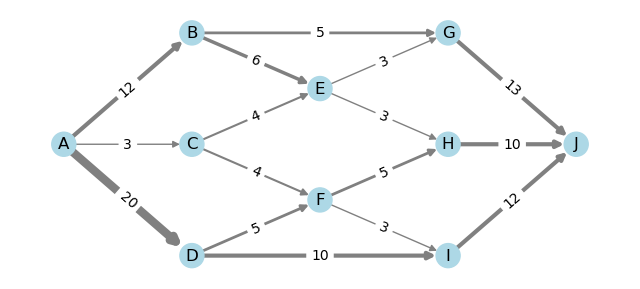

                           Capacities of pipeline pipes


In [4]:
# DRAW THE NETWORK with only capacities of the pipes labelled
# and whose maximum flow must then be calculated.
nx.draw_networkx(DG1,
        pos=ps,                    # Node positions
        node_color=ncols,
        font_color= 'k',           # For nodes
        edge_color=ecols,
        width= list(widths),       # Edge thickness according to capacity
        with_labels=True,)

# Edgelabels are drawn in a different command
nx.draw_networkx_edge_labels(DG1, pos=ps, edge_labels = edge_capacity,)
plt.axis("off")                    # Does not draw frames around the picture                              
plt.show()
print('                           Capacities of pipeline pipes')

In [5]:
# UPDATE EDGE LABELS TO CORRESPOND TO MAXIMUM FLOW

# Prepare a dictionary for individual pipe flows when the total flow is maximal.
edge_flow = {}
for e in DG1.edges:
    edge_flow[e]=0
    
# Updating the values of the 'edge_flow' dictionary when the total flow is maximal.
for (u, v) in edge_flow:
    edge_flow[(u, v)]=flow_dict[u][v]  
    #print(flow_dict["S"]["C"])  # The calculated flow of a single edge
# Now 'edge_flow' is ready to be fed into the edgelabels for the draw function
print('Edge_flow:', edge_flow)   

Edge_flow: {('A', 'B'): 11, ('A', 'C'): 2, ('A', 'D'): 15, ('B', 'E'): 6, ('B', 'G'): 5, ('C', 'E'): 0, ('C', 'F'): 2, ('D', 'F'): 5, ('D', 'I'): 10, ('E', 'G'): 3, ('E', 'H'): 3, ('F', 'H'): 5, ('F', 'I'): 2, ('G', 'J'): 8, ('H', 'J'): 8, ('I', 'J'): 12}


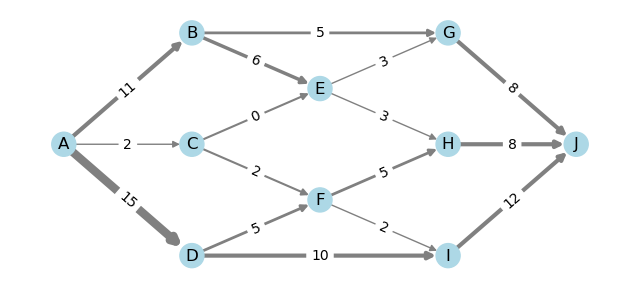

           Flows in the individual pipes when the total flow is maximal 28


In [6]:
# DRAW THE MAXIMUM FLOW NETWORK
nx.draw_networkx(DG1,
        pos=ps,
        node_color=ncols,
        font_color= 'k',
        edge_color=ecols,
        width=list(widths),      # Edge thickness according to capacity
        with_labels=True,) 
# Label printing
nx.draw_networkx_edge_labels(DG1, pos=ps, edge_labels = edge_flow,)
plt.axis("off")                                 
plt.show()
print('           Flows in the individual pipes when the total flow is maximal', flow_value) 

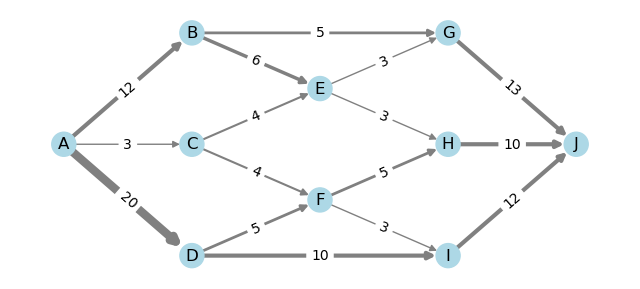

                     Capacities


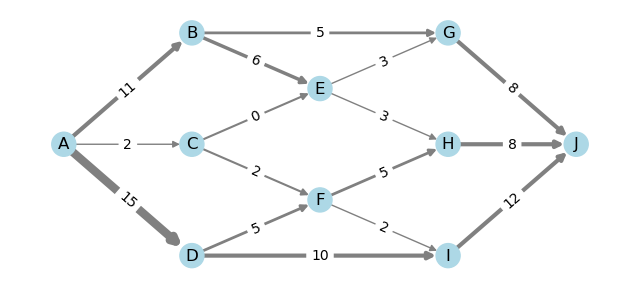

                      Maximum total flow = 28


In [7]:
# DRAW BOTH NETWORKS
nx.draw_networkx(DG1,
        pos=ps,
        node_color=ncols,
        font_color= 'k',
        edge_color=ecols,
        width= list(widths),  # Edge thickness according to capacity
        with_labels=True,) 
nx.draw_networkx_edge_labels(DG1, pos=ps, edge_labels = edge_capacity,)
plt.axis("off")                                    
plt.show()
print('                     Capacities')

nx.draw_networkx(DG1,
        pos=ps,
        node_color=ncols,
        font_color= 'k',
        edge_color=ecols,
        width= list(widths),  # Edge thickness according to capacity
        with_labels=True,) 
nx.draw_networkx_edge_labels(DG1, pos=ps, edge_labels = edge_flow,)
plt.axis("off")                                  
plt.show()
print('                      Maximum total flow =', flow_value) 

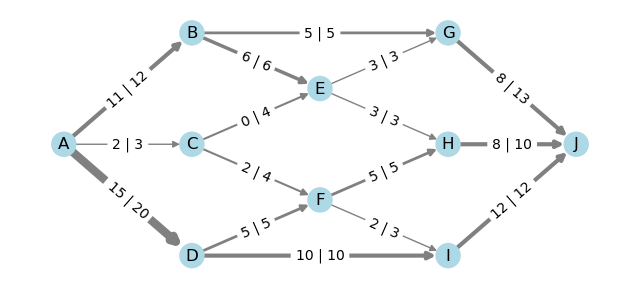

max flow_value = 28


In [8]:
# PRINT WITH FLOW | CAPACITY APPEARS ON THE SAME NETWORK
nx.draw_networkx(DG1,
        pos=ps,
        node_color=ncols,
        font_color= 'k',
        edge_color=ecols,
        width= list(widths),  # Edge thickness according to capacity
        with_labels=True,) 

# Edgelabels 'flow|capacity'
elabs = (dict([((u,v), f'{edge_flow[u,v]} | {edge_capacity[u,v]}')\
                          for u,v in edge_flow]))
# Including edge labels in the drawing
nx.draw_networkx_edge_labels(DG1, pos=ps, edge_labels = elabs) 
plt.axis("off")    # No frames                              
plt.show()
print('max flow_value =', flow_value) 

In [9]:
# EDGE COLORS ACCORDING TO THE FLOW 
# The pipes with the maximum flow are in red

for u, v in edge_capacity:
    #print(edge_flow[u,v]) 
    if edge_flow[u,v] == 0:
        DG1.edges[(u,v)]['color']= 'blue'
    if edge_flow[u,v] > edge_capacity[u, v]/2:
        DG1.edges[(u,v)]['color']= 'orange'
    if edge_flow[u,v] == edge_capacity[u, v]: 
        DG1.edges[(u,v)]['color']= 'red'
        
# Updating the color list for printing     
ecols = nx.get_edge_attributes(DG1, 'color').values()
print(ecols)

dict_values(['orange', 'orange', 'orange', 'red', 'red', 'blue', 'gray', 'red', 'red', 'red', 'red', 'red', 'orange', 'orange', 'orange', 'red'])


Maximum total flow value = 28


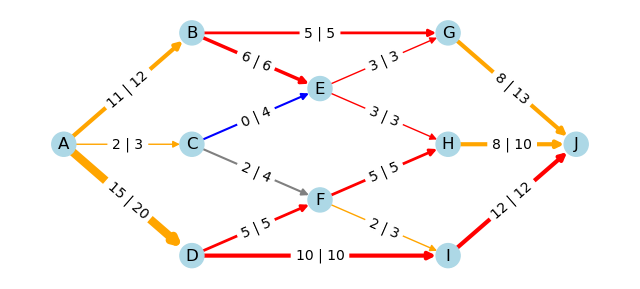

In [10]:
# PRINTING: flow, capacity, edge thickness, edge colors

nx.draw_networkx(DG1,
        pos=ps,
        node_color=ncols,
        font_color= 'k',
        edge_color=ecols,
        width= list(widths),  # Edge thickness according to capacity
        with_labels=True,) 

# Edgelabels 'flow|capacity'
elabs = (dict([((u,v), f'{edge_flow[u,v]} | {edge_capacity[u,v]}')\
                          for u,v in edge_flow]))
# Including edge labels in the drawing
nx.draw_networkx_edge_labels(DG1, pos=ps, edge_labels = elabs) 
plt.axis("off")    # No frames
print('Maximum total flow value =', flow_value) 

In [12]:
# CLARIFYING PRINTS
print(DG1.edges)
print()
# 'dict_values' for pipe colors
print(ecols)    
print(list(ecols)) # Previous as list
print()
# A dictionary for single pipe flows
print(dict([((u,v), f'{edge_flow[u,v]} | ')   for u,v in edge_flow]))
print()
# Single pipe flow
print(edge_flow[('F', 'I')])
print()
# Labels in the dictionary
elabs = (dict([((u,v), f'{edge_flow[u,v]} | {edge_capacity[u,v]} ')   for u,v in edge_flow]))
print(elabs) 
print()
# The capacity of one edge
print(edge_capacity['F', 'I'])


[('A', 'B'), ('A', 'C'), ('A', 'D'), ('B', 'E'), ('B', 'G'), ('C', 'E'), ('C', 'F'), ('D', 'F'), ('D', 'I'), ('E', 'G'), ('E', 'H'), ('F', 'H'), ('F', 'I'), ('G', 'J'), ('H', 'J'), ('I', 'J')]

dict_values(['orange', 'orange', 'orange', 'red', 'red', 'blue', 'gray', 'red', 'red', 'red', 'red', 'red', 'orange', 'orange', 'orange', 'red'])
['orange', 'orange', 'orange', 'red', 'red', 'blue', 'gray', 'red', 'red', 'red', 'red', 'red', 'orange', 'orange', 'orange', 'red']

{('A', 'B'): '11 | ', ('A', 'C'): '2 | ', ('A', 'D'): '15 | ', ('B', 'E'): '6 | ', ('B', 'G'): '5 | ', ('C', 'E'): '0 | ', ('C', 'F'): '2 | ', ('D', 'F'): '5 | ', ('D', 'I'): '10 | ', ('E', 'G'): '3 | ', ('E', 'H'): '3 | ', ('F', 'H'): '5 | ', ('F', 'I'): '2 | ', ('G', 'J'): '8 | ', ('H', 'J'): '8 | ', ('I', 'J'): '12 | '}

2

{('A', 'B'): '11 | 12 ', ('A', 'C'): '2 | 3 ', ('A', 'D'): '15 | 20 ', ('B', 'E'): '6 | 6 ', ('B', 'G'): '5 | 5 ', ('C', 'E'): '0 | 4 ', ('C', 'F'): '2 | 4 ', ('D', 'F'): '5 | 5 ', ('D', 'I'): '10 